# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import aidictive
import aidictive.trainer

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import PIL

import torch

# Prepare data

(200, 200, 3)

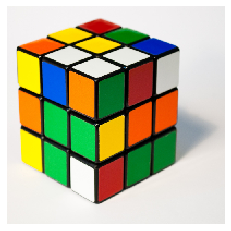

In [72]:
# Load and show the image the network is going to paint.
image_path = "input/rubik.jpg"
img = PIL.Image.open(image_path)
# Resize image to a fixed size.
W, H, C = 200, 200, 3
img = img.resize((W, H))
# Convert img to a numpy array so we can deal with it as any other array.
img = np.array(img)
# Plot image.
plt.axis("off")
plt.imshow(img)
# Check the shape of the image. It should have 3 channels.
img.shape

In [73]:
# Create input and target arrays.
train_X = np.array(list(np.ndindex(img.shape[0:2])))
train_Y = img.reshape(-1, 3)
n_pixels = len(train_X)

In [74]:
# Normalizing input and output.
precission = "float32"
train_X = ((train_X - np.mean(train_X)) / np.std(train_X)).astype(precission)
train_Y = (train_Y / 255.).astype(precission)

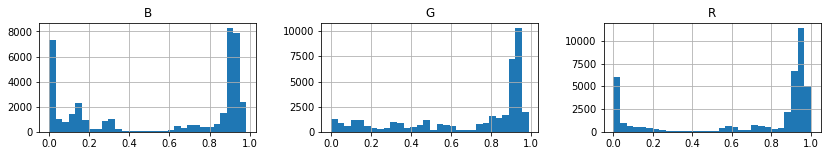

In [75]:
import pandas as pd

def plotRGB(Y):
    # Show predictions histogram.
    df = pd.DataFrame(Y, columns=["R", "G", "B"])
    df.hist(bins=30, figsize=(14, 2), layout=(1, 3))
    plt.show()

plotRGB(train_Y)

# Model definition

In [86]:
neurons, n_layers = 200, 7
layers = [2] + [neurons,] * n_layers + [C]
model = aidictive.models.FFNN(layers, activations="relu", last_activation=None)
model

FFNN(
  (seq): Sequential(
    (0): Linear(in_features=2, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=200, out_features=200, bias=True)
    (5): ReLU()
    (6): Linear(in_features=200, out_features=200, bias=True)
    (7): ReLU()
    (8): Linear(in_features=200, out_features=200, bias=True)
    (9): ReLU()
    (10): Linear(in_features=200, out_features=200, bias=True)
    (11): ReLU()
    (12): Linear(in_features=200, out_features=200, bias=True)
    (13): ReLU()
    (14): Linear(in_features=200, out_features=3, bias=True)
  )
)

# Training

In [87]:
trainer = aidictive.trainer.Trainer(model)

In [88]:
trainer.set_loss("mse")
trainer.set_metric("mse")
trainer.set_optimizer("sgd", lr=0.01, momentum=0.9)
trainer.set_scheduler("plateau", patience=10, factor=0.2, verbose=True)
trainer.set_train_data(train_X, train_Y, batch_size=8)

In [ ]:
trainer.fit(n_epochs=300)

# Test model

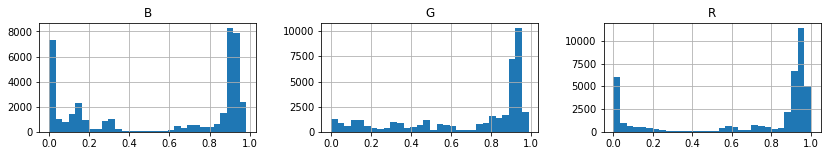

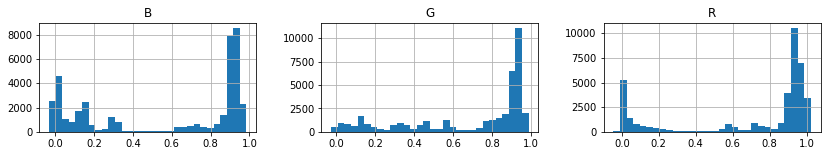

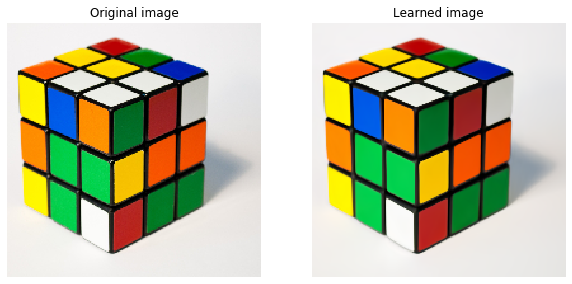

In [100]:
# Run predictions over all pixels.
pred = trainer.predict(train_X).numpy()
#pred = model(X).detach().numpy()
# Show predictions histogram.
plotRGB(train_Y)
plotRGB(pred)
# Reshape and cast predictions.
pred_img = pred.reshape(H, W, C).clip(0, 1)
plt.figure(figsize=(10, 5))
# Plot original image on the left.
plt.subplot(121)
plt.axis("off")
plt.title("Original image")
plt.imshow(train_Y.reshape(H, W, C), interpolation="nearest")
# Plot learned image on the right.
plt.subplot(122)
plt.axis("off")
plt.title("Learned image")
plt.imshow(pred_img, interpolation="nearest")

# Save your model

The poor computer has long trained a wonderful model.
Do not underestimate its efforts and save it for future use.

Change the name to something descriptive, like the number of layers and neurons and the title of the image you were painting.

In [99]:
aidictive.save(model, "output/nn_pain_rubik_200x7.pt")

# What's next?

Congratulations!! You managed to paint the Rubik's cube!
The next step is to continue playing with this demo, not only testing with your own images, but also changing some of the hyparameters:

 * How convergence speed changes with more layers/neurons?
 * How the batch size affects speed and learning?
 * An interesting thing to try is to change the loss from MSE to MAE and observe the differences between the images generated with each of the images.